FINITE DIFFERENCE METHODS
=========================

A finite difference is a technique by which derivatives of functions are approximated by
differences in the values of the function between a given value of the independent
variable, say $x_0$

There are 3 types of finite difference methods used for such approximations:

   + FORWARD DIFFERENCE
 
  The approximation
$$\frac{df}{dx}=\frac{f(x_0+h)-f(x_0)}{h}$$
is called a forward difference formula because the derivative is based on the value x=$x_0$
and it involves the function f(x) evaluated at $x = x_0+h$, i.e., at a point located forward from $x_0$ by an increment h. 



   + BACKWARD DIFFERENCE
   
   If we include the values of f(x) at x = $x_0$ - h, and x = $x_0$, the approximation is written as
   
$$\frac{df}{dx}=\frac{f(x_0)-f(x_0-h)}{h}$$

    and is called a backward difference formula. In both the cases the order of error is h.
    
   +CENTRAL DIFFERNCE
   
   using the central difference method the derivative can be approximated as 
   
   $$\frac{df}{dx}=\frac{f(x_0+h)-f(x_0-h)}{2h}$$
   
   the order of error in this case is $h^2$ thus it provides a better approximation given that our function is smooth and we dont have any issues along the boundaries.
   
   To obtain more accurate approximations we can use higher order derivatives but at the cost of making
the differences more expensive to compute. Other limitations of this method are faced with practical PDE problems which contain discontinuities (e.g. Heat flow through two mediums), in such cases the Taylor-series approximation is no longer valid.


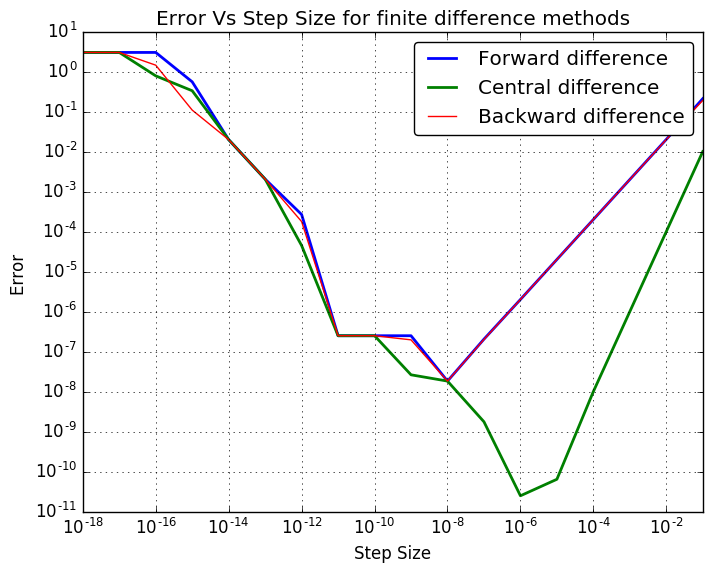

PyObject <matplotlib.legend.Legend object at 0x7f64757f8c10>

In [181]:
##A comparison between forward,central and backward difference scheme
using PyPlot

x0=1;

f(x)=x*x*x-x*x+2.0x+2.0;
#f(x)=x*x*x;
#f(x)=sin(x);
#f(x)=sin(x)+cos(x);



dx=zeros(18,1)
for i = 1:18;
    dx[i]=10.0^-i
end

err1=zeros(18,1)
err2=zeros(18,1)
err3=zeros(18,1)
for j=1:18;
    
    err1[j]=abs((f(x0+dx[j])-f(x0))/dx[j] - 3.0*x0*x0+2.0x0*x0-2.0)
    # doesnt work good for x=2,3,4
    err2[j]=abs((f(x0+dx[j])-f(x0-dx[j]))/2/dx[j] - 3.0*x0*x0+2.0x0*x0-2.0)
    err3[j]=abs((f(x0)-f(x0-dx[j]))/dx[j] - 3.0*x0*x0+2.0x0*x0-2.0)
    #err[j]=abs((f(x0+dx[j])-f(x0-dx[j]))/2/dx[j] - 3.0*x0*x0) # good for all x0 best 1,2
    #err[j]=abs((f(x0+dx[j])-f(x0-dx[j]))/2/dx[j] - cos(x0)) #fails at x=0
    #err[j]=abs((f(x0+dx[j])-f(x0-dx[j]))/2/dx[j] - cos(x0)+sin(x0))

end


loglog(dx,err1,linewidth=2,label="Forward difference")
loglog(dx,err2,linewidth=2,label="Central difference")
loglog(dx,err3,linewidth=1,label="Backward difference")
xlabel("Step Size")
ylabel("Error ")
title("Error Vs Step Size for finite difference methods")
grid("on")
legend(loc="upper right",fancybox="true")




SENSITIVITY TO STEP SIZE
-----------------------

Inappropriate step size could affect the optimization stability and efficiency.

The main sources of errors in finite difference methods are truncation errors. It's the error made by truncating an infinite sum (e.g. Taylor series) and approximating it by a finite sum.
As we can see from the plot, the truncation error decreases and reaches a minimun. 
As we go on decreasing the step size the subtractive cancellation error due to finite precision arithmetic gets added. Thus the error goes on increasing.

The optimal step size can be determined from sensitivity analysis to minimize the total numerical error, yet this will introduce additional computational burdens. 

COMPLEX VARIABLE TRICK
----------------------

 Given a function that is infinitely differentiable and can be smoothly extended into the complex plane. We can write it as F(z) and such function can be expanded about $x_0$ using the Taylor series.
 
 $$F(x_0+ih)=F(x_0)+ihF'(x_0)−\frac{h^2F″(x_0)}{2!}−i\frac{h^3F^{(3)}}{3!}+....$$
 
 Take the imaginary part of both sides and divide by h.
 
 $$F′(x_0)=Im(\frac{F(x_0+ih)}{h})+O(h^2)$$
 
 Evaluating the function $F$ for an imaginary argument $x_0+ih$ and dividing by h, gives an approximation to the value of the derivative, $F′(x_0)$, that is accurate to order $O(h^2)$.

 


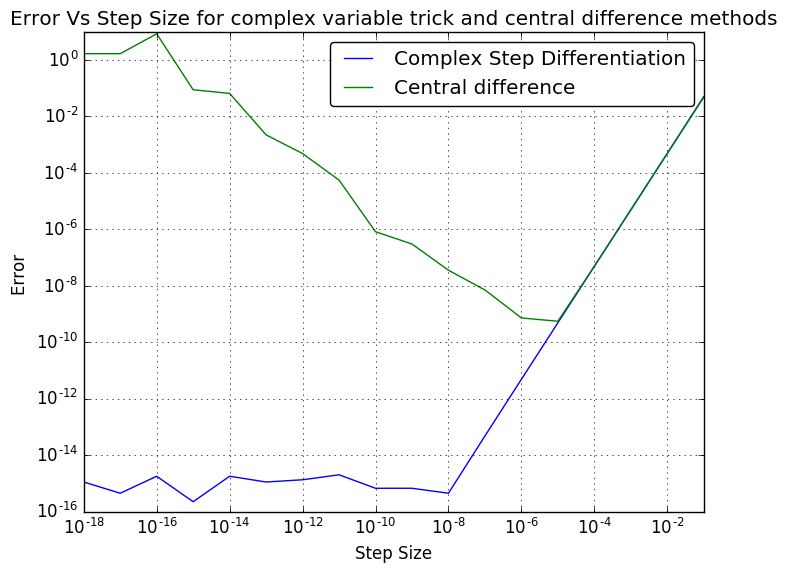

PyObject <matplotlib.legend.Legend object at 0x7f6474042ad0>

In [211]:
using Plotly
x0=1;

#f(x)=x*x*x-x*x+2.0x+2.0;
#f(x)=x*x*x;
#f(x)=sin(x);
#f(x)=sin(x)+cos(x);
f(x)=(eu^x)/((cos(x))^3+(sin(x))^3);



dx=zeros(18,1)
for i = 1:18;
    dx[i]=10.0^-i
end

err=zeros(18,1)
for j=1:18;
    #err[j]=abs(imag((f(x0 + im*dx[j]))/dx[j]) - 3.0*x0*x0+2.0x0*x0-2.0)
    # doesnt work good forx=2,3,4
    #err[j]=abs(imag((f(x0 + im*dx[j]))/dx[j]) - 3.0*x0*x0) # good for all x0 best 1,2
    #err[j]=abs(imag((f(x0 + im*dx[j]))/dx[j]) - cos(x0)) #fails at x=0
    #err[j]=abs(imag((f(x0 + im*dx[j]))/dx[j]) - cos(x0)+sin(x0))
    err1[j]=abs(imag((f(x0 + im*dx[j]))/dx[j]) - ((eu^(x0)*(cos(3.0*x0) + sin(3.0*x0)/2.0 + (3.0*sin(x0))/2.0))/(cos(x0)^3.0 + sin(x0)^3)^2.0))
    err2[j]=abs((f(x0+dx[j])-f(x0-dx[j]))/2/dx[j] - ((eu^(x0)*(cos(3.0*x0) + sin(3.0*x0)/2.0 + (3.0*sin(x0))/2.0))/(cos(x0)^3.0 + sin(x0)^3)^2.0))
end


loglog(dx,err1,label="Complex Step Differentiation")
loglog(dx,err2,label="Central difference")
xlabel("Step Size")
ylabel("Error ")
title("Error Vs Step Size for complex variable trick and central difference methods")
grid("on")
legend(loc="upper right",fancybox="true")
